José M. González
31/07/2020

# First Kaggle Competition

This is just an introductory competition with kaggle about house pricing.

![House Pricing](house.jpeg "House Pricing")

Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

## Loading packages and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sinfo import sinfo

sinfo()

-----
matplotlib  3.2.0
numpy       1.18.1
pandas      1.0.2
seaborn     0.10.0
sinfo       0.3.1
-----
IPython             7.13.0
jupyter_client      6.0.0
jupyter_core        4.6.3
notebook            6.0.3
-----
Python 3.8.3 (default, May 17 2020, 18:15:42) [GCC 10.1.0]
Linux-5.4.52-1-MANJARO-x86_64-with-glibc2.2.5
4 logical CPU cores
-----
Session information updated at 2020-08-01 18:40


## Loading Datasets

In [2]:
train = pd.read_csv("../house-prices-advanced-regression-techniques/train.csv", index_col= "Id")
test = pd.read_csv("../house-prices-advanced-regression-techniques/test.csv", index_col= "Id")


In [3]:
print(train.head(),"\n________________________________________________________________________\n\n", test.head())

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...     

## Let's EDA it out

In [4]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
print(train.head(5))

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...     

We can see that there are some ``NaN`` and different  registrations all over train.

In [7]:
train.duplicated().sum()
# no duplicates

0

In [8]:
train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

Different types of variables, from objects to floats and int64 at first sight. Since we want to predict the SalePrice let's check it out.

In [9]:
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

We can see that we have 1460 prices (or observations) and a max price per house for 755.000 (dollars? i assume), a minimum of 34.900 and a mean of 180921. So we have a skewed numeric information here.    

Text(0.5, 1.0, 'SalePrice distribution')

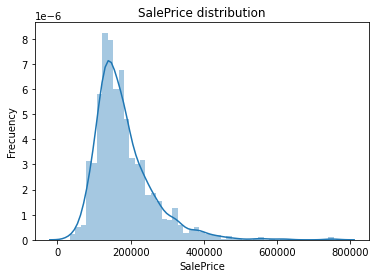

In [10]:
sns.distplot(train["SalePrice"])
plt.ylabel("Frecuency")
plt.title("SalePrice distribution")

As I assume, a right tailed distribution. Let's check another fun facts about this distribution

In [11]:
print("Skewness: {}".format(train["SalePrice"].skew()),
      "\nKurtosis: {}".format(train["SalePrice"].kurt()))


Skewness: 1.8828757597682129 
Kurtosis: 6.536281860064529


We are going to need to transform this variable to work with it since it's (positively) skewed. One of the most common ways to transform this kind of skewness it's a logistic transformation. We are going to use a nympy logarithmic transformation log1p which aplies a log(1+x) to every single element in the column

Skewness: 0.12134661989685333 
Kurtosis: 0.809519155707878


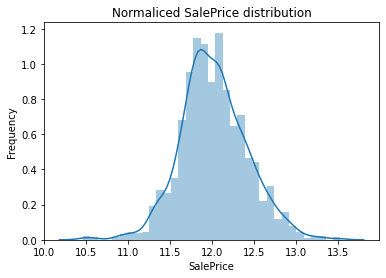

In [12]:
train["SalePrice"] = np.log1p(train["SalePrice"])

# and plot it again
sns.distplot(train["SalePrice"])
plt.ylabel("Frequency")
plt.title("Normaliced SalePrice distribution")

print("Skewness: {}".format(train["SalePrice"].skew()),
      "\nKurtosis: {}".format(train["SalePrice"].kurt()))


## Data Correlation
We are going to use a correlation map, also known as heat map. Let's check some variables and their correlation with the target. We can check the correlation in the upper plot, and we can focus on the variables that bright the most.

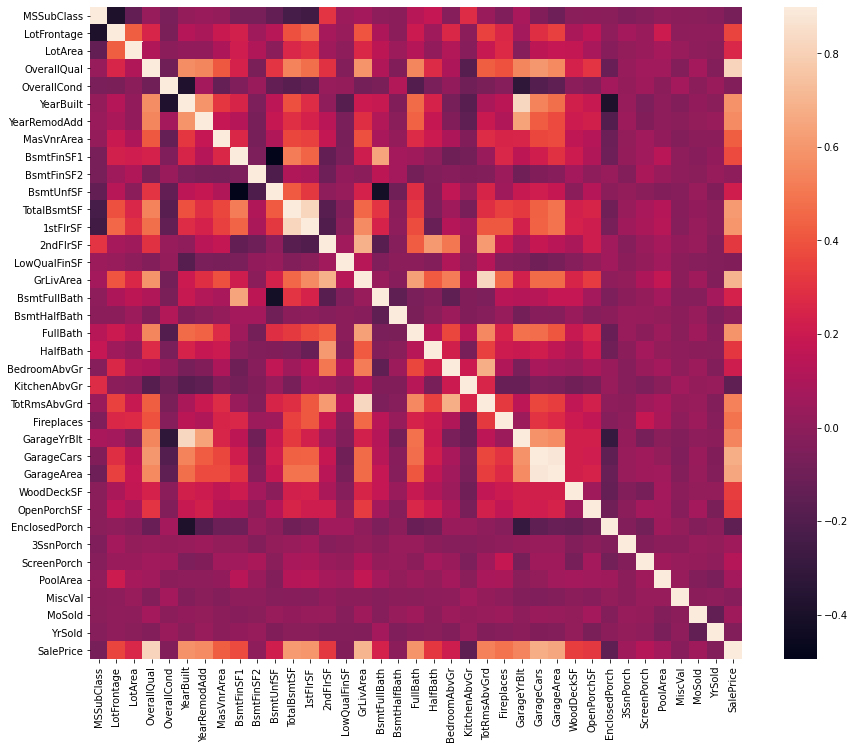

In [13]:
corrmat = train.corr()
plt.subplots(figsize = (15,12))
sns.heatmap(corrmat, vmax = 0.9, square = True)

Let's plot the most correlational variables in the dataset with our target.

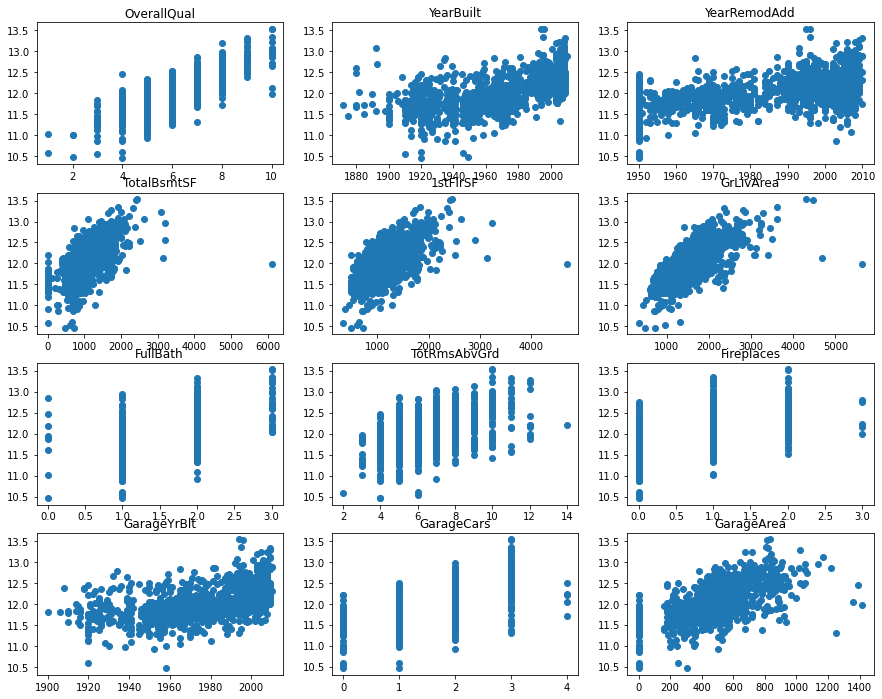

In [14]:
cols = ["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageCars", "GarageArea"]

fig, axs = plt.subplots(ncols = 3, nrows = 4, figsize = (15,12))
for i, var in enumerate(cols, 1):
    plt.subplot(4,3,i)
    plt.scatter(x = train[var], y = train["SalePrice"])
    plt.title(var)


We can see different outliers, variables that should be plotted in a different way (cathegorical variables?) and missing values (GarageArea, for example, has lots of 0... could be missing or that house doesn't have any garage)

We have a coupple of outliers that can be deleted, like thosse on TotRmsAbvGrd where we can see 1 single dot > 4000 and the same happens in GrLivArea, where we can see 3 or 4 and 1stFlrSF. Since we have lot's of samples we don't really need those numbers, we can include them into the most common value for that range of price, or we can delete them.

Removing lot's of outliers is not suggested since we need to mantain the data as much as we can. So I'm only going to remove the most extreme outliers from GrLivArea, TotalBsmtSF, and 1stFlrSF

Let's properly plot the cathegorical variablers.

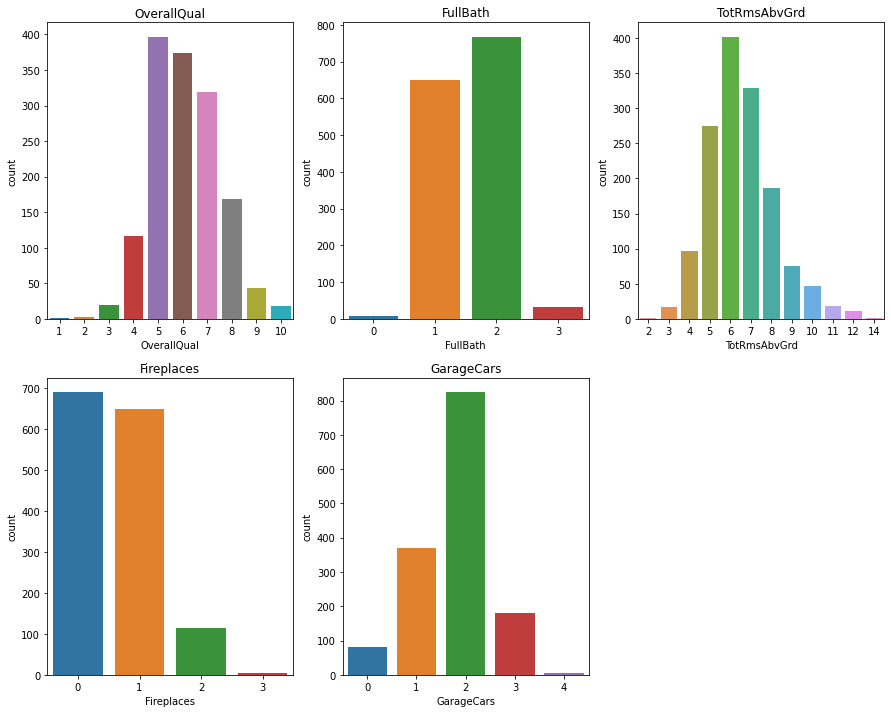

In [15]:
cat_cols = ["OverallQual", "FullBath", "TotRmsAbvGrd", "Fireplaces", "GarageCars"]

fig, axs = plt.subplots(ncols = 2, nrows = 3, figsize = (15,12))
for i, var in enumerate(cat_cols, 1):
    plt.subplot(2,3,i)
    sns.countplot(x = train[var])
    plt.title(var)


We can extract some conclussions from here. Conclussions like the most common space for cars is the 2 cars per garage, and 4 its the most uncommon (probably the most expensive). Having 3 fireplaces is very rare, and it's pretty usual to have 0 or 1 fireplace at home. Having 1 or 2 bathrooms above ground it's the most common situation, where having 0 or 3 it's very rare.

## Removing outliers

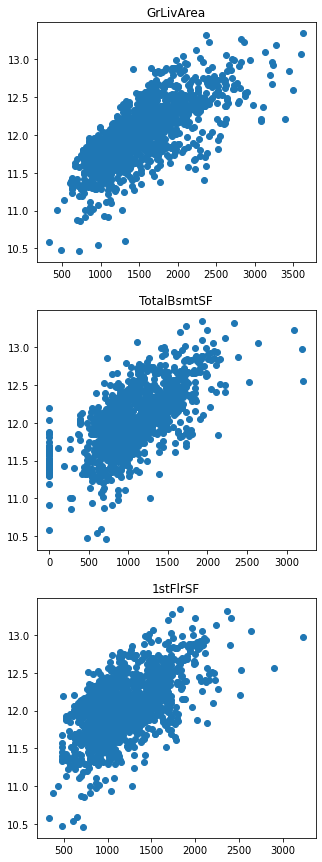

In [27]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

train = train.drop(train[(train['TotalBsmtSF']>4000) & (train['SalePrice']<300000)].index)

train = train.drop(train[(train['1stFlrSF']>4000) & (train['SalePrice']<300000)].index)

cols = ["GrLivArea", "TotalBsmtSF", "1stFlrSF"]

fig, axs = plt.subplots(ncols = 3, nrows = 1, figsize = (5,15))
for i, var in enumerate(cols, 1):
    plt.subplot(3,1,i)
    plt.scatter(x = train[var], y = train["SalePrice"])
    plt.title(var)


## Feature Engineering

First, we concatenate train and test, so we feature engineer both at the same time, we can create a new column called train and another test, so in the future, if we want to, we can spread them again even if we drop the id's.

In [30]:
train["type"] = 0
test["type"] = 1


totalDF = pd.concat((train,test)).reset_index(drop = True)
totalDF.drop(["SalePrice"], axis = 1, inplace = True) # we want to drop the SalePrice column since test doesn't have that column

print("The new DataFrame shape is: {} x {}".format(totalDF.shape[0], totalDF.shape[1]))

The new DataFrame shape is: 2915 x 80


In [31]:
totalDF

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,type
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,1
2911,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,1
2912,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,1
2913,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,1


In [32]:
# Let's work on missings
totalDF_na = (totalDF.isnull().sum() /len(totalDF)) * 100 # here we are coding a % of data miss
totalDF_na = totalDF_na.drop(totalDF_na[totalDF_na == 0].index).sort_values(ascending = False)[:30] # here we are dropping all the indexes that has a number equal to 0 and sorting them
missing_data = pd.DataFrame({"Missing Ratio" : totalDF_na}) # we are creating a simple dataframe as a dictionary
missing_data.head(10) # we are printing the first 10 lines

,Missing Ratio
PoolQC,99.725557
MiscFeature,96.397942
Alley,93.207547
Fence,80.445969
FireplaceQu,48.713551
LotFrontage,16.672384
GarageFinish,5.454545
GarageYrBlt,5.454545
GarageQual,5.454545
GarageCond,5.454545


Text(0.5, 1.0, ' % of missing data by feature')

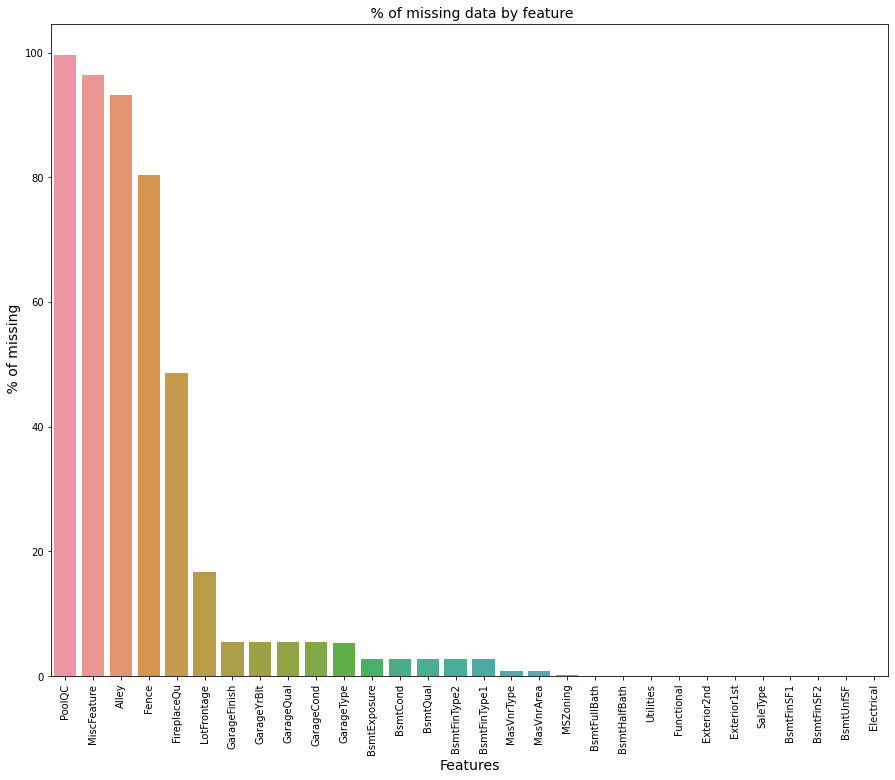

In [18]:
# And now we plot the missing values to check how they are
fif, ax = plt.subplots(figsize = (15,12)) # set up the size of the plot you are printing
plt.xticks(rotation = "90") # rotate the names, so they don't collapse on each other
sns.barplot(x = totalDF_na.index, y = totalDF_na) # axis on the plot
plt.xlabel("Features", fontsize = 14)
plt.ylabel(" % of missing", fontsize = 14)
plt.title(" % of missing data by feature", fontsize = 14)

Here we see that the variables with the highest number of missings are variables that are related with eachother like PoolQC and Fence, which maches sense, since if you don't have pool you'll probably not going to have a fence. Some other variables like Alley, we can check in the description that NA means that the house has no Alley, that needs to be recodified to 0, and the same happens with PoolQC, where Na means 0 (there is no pool in the house).

In the database description we can find a lot of information about the missings.

In [33]:
totalDF["PoolQC"] = totalDF["PoolQC"].fillna("None")

totalDF["MiscFeature"] = totalDF["MiscFeature"].fillna("None")

totalDF["Fence"] = totalDF["Fence"].fillna("None")

totalDF["FireplaceQu"] = totalDF["FireplaceQu"].fillna("None")

In [34]:
# I'm going to fill the missing values by the median LotFrontage of all the neighborhood. But I need to, first, group by neighborhood

totalDF["LotFrontage"] = totalDF.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [ ]:
# Here I'm filling with nones 4 variables in a single loop. We can do this from the begining if we take notes and study the documentation, but for studying porpuses I'm going to show different ways to do the same process

for col in ("GarageType", "GarageFinish", "GarageQual", "GarageCond"):
    totalDF[col] = totalDF[col].fillna("None")